In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import numpy as np
import qiskit
%matplotlib inline

In [2]:
# generate EPR pair

#EPR
q = QuantumRegister(2,'q')
c = ClassicalRegister(4,'c')

EPR_circ = QuantumCircuit(q,c)
EPR_circ.h(q[0]) # q[0] for Alice
EPR_circ.cx(q[0],q[1]) # q[1] for Bob
EPR_circ.barrier(q)
EPR_circ.draw()

In [3]:
# Alice measurement
A1 = QuantumCircuit(q,c) # Z basis
A1.measure(q[0],c[0])

#A2 = QuantumCircuit(q,c)

A3 = QuantumCircuit(q,c) # X basis
A3.h(q[0])
A3.measure(q[0],c[0])

#A1.draw()
#A3.draw()

# Bob measurement
#B1 = QuantumCircuit(q,c) 

B2 = QuantumCircuit(q,c) # X basis
B2.h(q[1])
B2.measure(q[1],c[1])

B3 = QuantumCircuit(q,c) # Z basis
B3.measure(q[1],c[1])

#B2.draw()
#B3.draw()

In [4]:
# Alice and Bob randomly choose bases

n=70 # n ERP pairs

import random
def random_01str(list,num):
    for i in range(num):
        list.append(random.randint(0,1))
        
Alice_basis=[]
Bob_basis=[]

Alice_basis.clear()
Bob_basis.clear()

random_01str(Alice_basis,n)
random_01str(Bob_basis,n)

print("Alice_basis A1(0)(Z) or A3(1)(X) : {}".format(Alice_basis))
print("Bob_basis   B3(0)(Z) or B2(1)(X) : {}".format(Bob_basis))

Alice_basis A1(0)(Z) or A3(1)(X) : [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
Bob_basis   B3(0)(Z) or B2(1)(X) : [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]


In [5]:
# generate circuits

Alice_circ = [A1,A3]
Bob_circ = [B3,B2]

circuits=[]
circuits.clear()

for i in range(n):
    OneCircuit = EPR_circ + Alice_circ[Alice_basis[i]] + Bob_circ[Bob_basis[i]]
    
    #if Alice_basis[i]==0:
    #    OneCircuit += A1 
    #elif Alice_basis[i]==1:
    #    OneCircuit += A3
    
    #if Bob_basis[i]==0:
    #    OneCircuit += B3 
    #elif Bob_basis[i]==1:
    #    OneCircuit += B2
    
    circuits.append(OneCircuit)
      
circuits[0].draw()

{'0000': 1}


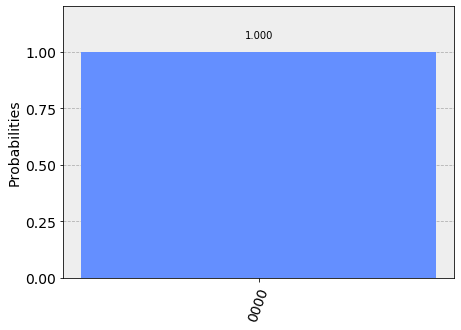

In [6]:
from qiskit import execute, BasicAer
from qiskit.tools.visualization import plot_histogram
backend=BasicAer.get_backend('qasm_simulator')
result = execute(circuits, backend=backend, shots=1).result()  

count=result.get_counts(circuits[0])
print(count)
plot_histogram(count)

In [7]:
# get Alice's result and Bob's result

#result = list(result.get_counts(circuits[i]))[0]
Alice_result=[]
Bob_result=[]

Alice_result.clear()
Bob_result.clear()

for i in range(n):
    Alice_result.append(int((list(result.get_counts(circuits[i]))[0])[3]))
    Bob_result.append(int((list(result.get_counts(circuits[i]))[0])[2]))
    
print("Alice_result = {}".format(Alice_result))
print("Bob_result   = {}".format(Bob_result))

Alice_result = [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
Bob_result   = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]


In [8]:
#Check the same basis

pos=[]
key1=[]

pos.clear()
key1.clear()

for i in range(n):
    if Alice_basis[i]==Bob_basis[i]:
        pos.append(i)
        key1.append(Alice_result[i])

print("pos= {}".format(pos))
print("key1   = {}".format(key1))

key2=key1

pos= [1, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 16, 21, 23, 25, 27, 30, 33, 34, 35, 37, 38, 39, 41, 42, 45, 47, 48, 53, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 69]
key1   = [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]


In [9]:
# Check result (whether Alice's qubit is measured the same as Bob's)

num=len(key2)
total_times=len(key2)//2
right_times = 0

for i in range(total_times):
    rand=random.randint(0,num-1)
    if Alice_result[pos[rand]]==Bob_result[pos[rand]]:
        right_times+=1
        print("check pos = {}, ".format(pos[rand]),end=' ')
        print("Alice {} = Bob {}".format(Alice_result[pos[rand]],Bob_result[pos[rand]]))
    else :
        print("check pos = {}".format(pos[rand]),end=' ')
        print("Alice {} != Bob {}".format(Alice_result[pos[rand]],Bob_result[pos[rand]]))
        print("different qubit has been found")

    del key2[rand]
    del pos[rand]
    num-=1
    
print("key2 = {}".format(key2))
acc=(right_times/total_times)
print("accuracy = {}%".format(acc*100))

check pos = 11,  Alice 0 = Bob 0
check pos = 33,  Alice 0 = Bob 0
check pos = 38,  Alice 0 = Bob 0
check pos = 16,  Alice 1 = Bob 1
check pos = 58,  Alice 1 = Bob 1
check pos = 12,  Alice 1 = Bob 1
check pos = 35,  Alice 1 = Bob 1
check pos = 62,  Alice 0 = Bob 0
check pos = 25,  Alice 1 = Bob 1
check pos = 42,  Alice 0 = Bob 0
check pos = 39,  Alice 1 = Bob 1
check pos = 48,  Alice 1 = Bob 1
check pos = 63,  Alice 0 = Bob 0
check pos = 64,  Alice 0 = Bob 0
check pos = 60,  Alice 0 = Bob 0
check pos = 10,  Alice 0 = Bob 0
check pos = 23,  Alice 1 = Bob 1
check pos = 54,  Alice 0 = Bob 0
check pos = 21,  Alice 1 = Bob 1
check pos = 9,  Alice 0 = Bob 0
key2 = [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
accuracy = 100.0%


In [16]:
# eavesdropper

# Eve measurement
E1_A = QuantumCircuit(q,c) # Z basis for Alice's
E1_A.measure(q[0],c[2])

E2_A = QuantumCircuit(q,c) # X basis for Alice's
E2_A.h(q[0])
E2_A.measure(q[0],c[2])

E3_A = QuantumCircuit(q,c) # don't measure

E1_B = QuantumCircuit(q,c) # Z basis for Bob's
E1_B.measure(q[1],c[3])

E2_B = QuantumCircuit(q,c) # X basis for Bobs
E2_B.h(q[1])
E2_B.measure(q[1],c[3])

E3_B = QuantumCircuit(q,c) # don't measure

#E1_A.draw()
#E2_A.draw()
#E3_A.draw()
#E1_B.draw()
#E2_B.draw()
#E3_B.draw()

In [17]:
def EveRandom_01str(list,num):
    for i in range(num):
        list.append(random.randint(0,2))

Eve_basis_for_Alice=[]
Eve_basis_for_Bob=[]

Eve_basis_for_Alice.clear()
Eve_basis_for_Bob.clear()

EveRandom_01str(Eve_basis_for_Alice,n)
EveRandom_01str(Eve_basis_for_Bob,n)

print("Eve_basis_for_Alice E1_A(0)(Z) or E2_A(1)(X) or E3_A(2)(don't measure) : {}".format(Eve_basis_for_Alice))
print("Eve_basis_for_Bob   E1_B(0)(Z) or E2_B(1)(X) or E3_B(2)(don't measure) : {}".format(Eve_basis_for_Bob))

Eve_basis_for_Alice E1_A(0)(Z) or E2_A(1)(X) or E3_A(2)(don't measure) : [0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1]
Eve_basis_for_Bob   E1_B(0)(Z) or E2_B(1)(X) or E3_B(2)(don't measure) : [2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1]


In [19]:
Eve_circ_for_Alice = [E1_A,E2_A,E3_A]
Eve_circ_for_Bob = [E1_B,E2_B,E3_B]

circuits_eve=[]
circuits_eve.clear()

for i in range(n):
    OneCircuit_eve = EPR_circ + Eve_circ_for_Alice[Eve_basis_for_Alice[i]] + Eve_circ_for_Bob[Eve_basis_for_Bob[i]] + Alice_circ[Alice_basis[i]] + Bob_circ[Bob_basis[i]]
    
    circuits_eve.append(OneCircuit_eve)
      
circuits_eve[0].draw()

{'0110': 1}


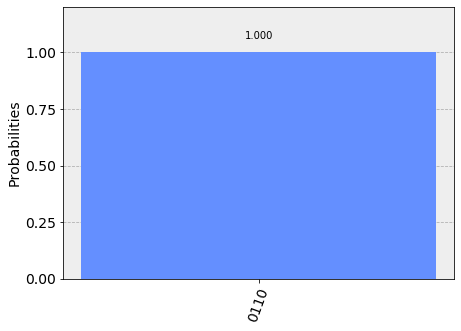

In [20]:
result_eve = execute(circuits_eve, backend=backend, shots=1).result()  

count_eve=result_eve.get_counts(circuits_eve[0])
print(count_eve)
plot_histogram(count_eve)

In [21]:
# result = list(result.get_counts(circuits[i]))[0]
Alice_result_eve=[]
Bob_result_eve=[]

Alice_result_eve.clear()
Bob_result_eve.clear()

for i in range(n):
    Alice_result_eve.append(int((list(result_eve.get_counts(circuits_eve[i]))[0])[3]))
    Bob_result_eve.append(int((list(result_eve.get_counts(circuits_eve[i]))[0])[2]))
    
print("Alice_result_eve = {}".format(Alice_result_eve))
print("Bob_result_eve   = {}".format(Bob_result_eve))

Alice_result_eve = [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1]
Bob_result_eve   = [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]


In [31]:
#Check the same basis

pos_eve=[]
key1_eve=[]

pos_eve.clear()
key1_eve.clear()

for i in range(n):
    if Alice_basis[i]==Bob_basis[i]:
        pos_eve.append(i)
        key1_eve.append(Alice_result_eve[i])

print("pos_eve= {}".format(pos_eve))
print("key1_eve   = {}".format(key1_eve))

key2_eve=[]
key2_eve.clear()
#key3_eve.clear()
#pos3_eve.clear()

key2_eve=key1_eve
#key3_eve=key1_eve
#pos3_eve=pos_eve

pos_eve= [1, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 16, 21, 23, 25, 27, 30, 33, 34, 35, 37, 38, 39, 41, 42, 45, 47, 48, 53, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 69]
key1_eve   = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]


In [32]:
# Check result (whether Alice's qubit is measured the same as Bob's)

num_eve=len(key2_eve)
total_times_eve=len(key2_eve)//2
right_times_eve = 0

for i in range(total_times_eve):
    rand=random.randint(0,num_eve-1)
    if Alice_result_eve[pos_eve[rand]]==Bob_result_eve[pos_eve[rand]]:
        right_times_eve+=1
        print("check pos = {}, ".format(pos_eve[rand]),end=' ')
        print("Alice {} = Bob {}".format(Alice_result_eve[pos_eve[rand]],Bob_result_eve[pos_eve[rand]]))
    else :
        print("check pos = {}".format(pos_eve[rand]),end=' ')
        print("Alice {} != Bob {}".format(Alice_result_eve[pos_eve[rand]],Bob_result_eve[pos_eve[rand]]))
        print("different qubit has been found")

    del key2_eve[rand]
    del pos_eve[rand]
    num_eve-=1
    
print("key2_eve = {}".format(key2_eve))
acc_eve=(right_times_eve/total_times_eve)
print("accuracy = {}%".format(acc_eve*100))

check pos = 16,  Alice 1 = Bob 1
check pos = 58,  Alice 0 = Bob 0
check pos = 47 Alice 1 != Bob 0
different qubit has been found
check pos = 34,  Alice 1 = Bob 1
check pos = 60,  Alice 1 = Bob 1
check pos = 66,  Alice 0 = Bob 0
check pos = 54,  Alice 0 = Bob 0
check pos = 65,  Alice 1 = Bob 1
check pos = 1 Alice 0 != Bob 1
different qubit has been found
check pos = 53 Alice 0 != Bob 1
different qubit has been found
check pos = 27,  Alice 1 = Bob 1
check pos = 11,  Alice 0 = Bob 0
check pos = 59,  Alice 0 = Bob 0
check pos = 64,  Alice 1 = Bob 1
check pos = 10 Alice 1 != Bob 0
different qubit has been found
check pos = 69,  Alice 1 = Bob 1
check pos = 25,  Alice 1 = Bob 1
check pos = 7,  Alice 0 = Bob 0
check pos = 55,  Alice 1 = Bob 1
check pos = 37,  Alice 1 = Bob 1
key2_eve = [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0]
accuracy = 80.0%


In [34]:
# Check all result (whether all Alice's qubits are measured the same as Bob's)

pos3_eve=[]
key3_eve=[]

pos3_eve.clear()
key3_eve.clear()

for i in range(n):
    if Alice_basis[i]==Bob_basis[i]:
        pos3_eve.append(i)
        key3_eve.append(Alice_result_eve[i])

print("pos3_eve= {}".format(pos3_eve))
print("key3_eve   = {}".format(key3_eve))



#Check all result

num_eve3=len(key3_eve)
total_times_eve3=len(key3_eve)
right_times_eve3 = 0

for i in range(total_times_eve3):
    rand=random.randint(0,num_eve3-1)
    if Alice_result_eve[pos3_eve[rand]]==Bob_result_eve[pos3_eve[rand]]:
        right_times_eve3+=1
        print("check pos = {}, ".format(pos3_eve[rand]),end=' ')
        print("Alice {} = Bob {}".format(Alice_result_eve[pos3_eve[rand]],Bob_result_eve[pos3_eve[rand]]))
    else :
        print("check pos = {}".format(pos3_eve[rand]),end=' ')
        print("Alice {} != Bob {}".format(Alice_result_eve[pos3_eve[rand]],Bob_result_eve[pos3_eve[rand]]))
        print("different qubit has been found")

    del key3_eve[rand]
    del pos3_eve[rand]
    num_eve3-=1
    
print("key3_eve = {}".format(key3_eve))
acc_eve3=(right_times_eve3/total_times_eve3)
print("accuracy = {}%".format(acc_eve3*100))

pos3_eve= [1, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 16, 21, 23, 25, 27, 30, 33, 34, 35, 37, 38, 39, 41, 42, 45, 47, 48, 53, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 69]
key3_eve   = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]
check pos = 35,  Alice 1 = Bob 1
check pos = 62 Alice 0 != Bob 1
different qubit has been found
check pos = 12 Alice 0 != Bob 1
different qubit has been found
check pos = 65,  Alice 1 = Bob 1
check pos = 8 Alice 0 != Bob 1
different qubit has been found
check pos = 41,  Alice 1 = Bob 1
check pos = 25,  Alice 1 = Bob 1
check pos = 64,  Alice 1 = Bob 1
check pos = 57,  Alice 1 = Bob 1
check pos = 33,  Alice 1 = Bob 1
check pos = 55,  Alice 1 = Bob 1
check pos = 1 Alice 0 != Bob 1
different qubit has been found
check pos = 37,  Alice 1 = Bob 1
check pos = 66,  Alice 0 = Bob 0
check pos = 58,  Alice 0 = Bob 0
check pos = 30,  Alice 0 = Bob 0
check pos = 14,  Alice 0 = Bob 0
check pos = 10 